## Airline Tweets Sentiment Analysis

**PURPOSE**: Use NLP to build a model to perform sentiment analysis on tweets for various US Airlines

**AUTHOR** : Maureen Wiebe

**DATA SOURCES**:<br> 
- Kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
    
**REV DATE**: 6-21-2021

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from nltk import FreqDist
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix

### Import Preprocessed Data

In [2]:
tweets = pd.read_pickle('C:/Users/mwalz2/Documents/Python/Springboard/Airline_Tweets/data/interim/tweets.pkl')

In [3]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,org_text,hashtag_count,tokens,words,stemmed,lemmatizied
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),@VirginAmerica What @dhepburn said.,0,[said],3,[said],[said]
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),@VirginAmerica plus you've added commercials t...,0,"[plus, added, commercials, experience, ..., ta...",10,"[plu, ad, commerci, experi, ..., tacki]","[plus, added, commercial, experience, ..., tacky]"
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),@VirginAmerica I didn't today... Must mean I n...,0,"[today, ..., must, mean, need, take, another, ...",13,"[today, ..., must, mean, need, take, anoth, trip]","[today, ..., must, mean, need, take, another, ..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),@VirginAmerica it's really aggressive to blast...,0,"[really, aggressive, blast, obnoxious, enterta...",19,"[realli, aggress, blast, obnoxi, entertain, gu...","[really, aggressive, blast, obnoxious, enterta..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),@VirginAmerica and it's a really big bad thing...,0,"[really, big, bad, thing]",9,"[realli, big, bad, thing]","[really, big, bad, thing]"


### Create Bag of Words Matrix
To create a model we need to create a table that uses all of the individual tokens as features and indicates which tweets contain which tokens. Since I have already pre-processed the data, a pass through function is  used for tokenization as well as preprocessing. 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

def dummy(doc):
    return doc

cv = CountVectorizer(
        tokenizer=dummy,
        preprocessor=dummy,
    )  

bow = cv.fit_transform(tweets['lemmatizied'])

In [5]:
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())
bow_df.head()

,#aa,#aaadvantage,#aaalwayslate,#aadelay,#aafail,#aateam,#abcletjetbluestreamfeed,#abcnews,#abq,#accessibility,...,😷,😻,🙅,🙈,🙉,🙌,🙏,🚪,🚫,🚶
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reduce Dimensionality 

To make the model more manageable only frequently used words will be included in the final matrix. The number of words included in the matrix was reduced from 11,500 to about 1,600.  

In [6]:
corpus = tweets['lemmatizied'].sum()
frequency_dist = FreqDist(corpus)
highest_freq = [key for key, value in frequency_dist.items() if value >10]

In [7]:
bow_df = bow_df[highest_freq]

In [8]:
tweets_model = pd.concat([tweets[["airline_sentiment", "airline","hashtag_count","words"]],bow_df],axis =1)

In [9]:
tweets_model.head()

,airline_sentiment,airline,hashtag_count,words,said,plus,added,commercial,experience,...,...,jblu,💙,appease,#flyingitforward,journal,dividend,chairman,#usairways,usairways,locator
0,neutral,Virgin America,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,positive,Virgin America,0,10,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,neutral,Virgin America,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,negative,Virgin America,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,negative,Virgin America,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#change airline feature from categorical variable via one-hot-encoding 

tweets_model= pd.get_dummies(tweets_model, columns =['airline'],drop_first = True)

### Baseline Model
To identify how much value a model is providing we need a baseline model that demostrates the prediction accuracy without having a model.   In this case we will use the weighted guessing or random rate to arrive at a baseline predictive value.   Weighted guessing assumes that you know the sizes of the classes ahead of time and therefore your guessing is aligned with the size of each class. 
https://towardsdatascience.com/calculating-a-baseline-accuracy-for-a-classification-model-a4b342ceb88f

In [11]:
#calculate the size of each category 
tweets.airline_sentiment.value_counts(normalize = True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [12]:
print("The baseline accuracy based on weighted guessing is: ", 0.627**2 + 0.212**2 + 0.161**2)

The baseline accuracy based on weighted guessing is:  0.463994


### Create Model Setup

In [13]:
X = tweets_model.drop(['airline_sentiment','airline_1','airline_2'],axis =1)
y = tweets_model['airline_sentiment']

### Scaling Count Features

In [14]:
#scale hashtag count and total number of words to normalize to the rest of the model
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X[['hashtag_count', 'words']] = scale.fit_transform(X[['hashtag_count', 'words']])

### Splitting the Dataset: Train & Test
To ensure that we can reliably test how good the model is at predicting outcomes, the dataset will be split into a train set (for training the model) and a test set to calculate performance metrics on.  A 70/30 split will be used.  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
model ='Random Forest'
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [19]:
y_pred = rf.predict(X_test)

report = classification_report(y_test, y_pred)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      2742
     neutral       0.61      0.39      0.47       940
    positive       0.74      0.57      0.64       710

    accuracy                           0.75      4392
   macro avg       0.71      0.63      0.66      4392
weighted avg       0.74      0.75      0.74      4392



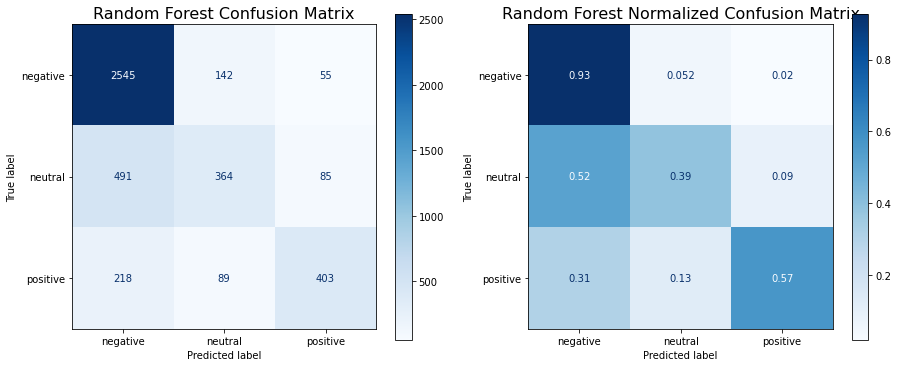

In [21]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 6), nrows = 1, ncols = 2)

plot_confusion_matrix(rf,X_test, y_test,cmap=plt.cm.Blues, ax=ax1)
plot_confusion_matrix(rf,X_test, y_test,cmap=plt.cm.Blues, normalize='true',ax=ax2)
ax1.set_title('Random Forest Confusion Matrix', fontsize =16)
ax2.set_title('Random Forest Normalized Confusion Matrix', fontsize =16)
plt.show()

20


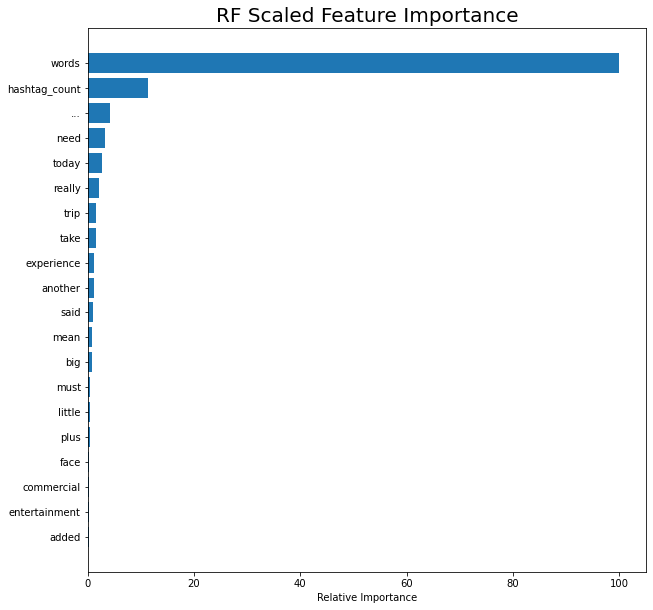

In [22]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:20]
sorted_idx = np.argsort(feature_importance)[:20]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('RF Scaled Feature Importance', fontsize =20)
plt.show()

### SentiWordNet: Feature Enhancement
Over time dictionaries have been developed that assign a positivity and negativity score to a particular word.  The purpose of these resources is to aid in sentiment analysis but assessing each word of your text and developing an overall score. To attempt to increase the accuracy of this model an additional feature was created that combines the individual word scores for an overall sentiment score for the entire tweet. 
https://krakensystems.co/blog/2019/sentiment-analysis-rule-based

In [23]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

In [24]:
def penn_to_wn(tag):
# Convert between the PennTreebank tags to simple Wordnet tags
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def sentiment_sentiwordnet(text):
    sentiment = 0
    tokens_count = 0
    lemmatizer = WordNetLemmatizer()
   
    for token in text:
        tagged_list = pos_tag(token)

        for word, tag in tagged_list:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue

            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue

            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue

            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            word_sent = swn_synset.pos_score() - swn_synset.neg_score()

            if word_sent != 0:
                sentiment += word_sent
                tokens_count += 1

    if tokens_count == 0:
        return 0
    else: 
        return sentiment



In [27]:
#create a list of the scores for all individual tweets and add to a column in the tweets table
sentiment_score = []
sentiment_score.append(tweets.lemmatizied.apply(sentiment_sentiwordnet))
tweets['senti_score'] =pd.Series(sentiment_score)[0]

In [28]:
#initially the result does not suggest that this feature will improve our results
tweets.pivot_table(index = 'airline_sentiment', values ='senti_score', aggfunc =['mean','median','min','max'])

,mean,median,min,max
,senti_score,senti_score,senti_score,senti_score
airline_sentiment,,,,
negative,1.545407,1.500,-1.625,6.875
neutral,1.012262,0.875,-1.750,5.500
positive,1.059194,0.875,-1.250,5.625


### Create New Model Dataset

In [29]:
tweets_model = pd.concat([tweets[["airline_sentiment", "airline","hashtag_count","words",'senti_score']],bow_df],axis =1)
tweets_model= pd.get_dummies(tweets_model, columns =['airline'],drop_first = True)

X = tweets_model.drop(['airline_sentiment','airline_1','airline_2'],axis =1)
y = tweets_model['airline_sentiment']

### Scale Features 

In [30]:
scale = MinMaxScaler()
X[['senti_score','hashtag_count', 'words']] = scale.fit_transform(X[['senti_score','hashtag_count', 'words']])

### Train, Test, Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Random Forest Model + Sentiment Score

In [32]:
from sklearn.ensemble import RandomForestClassifier
model ='Random Forest with Sentiment Score'
rfs = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs=-1)

rfs.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
y_pred = rfs.predict(X_test)

report = classification_report(y_test, y_pred)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.94      0.85      2778
     neutral       0.65      0.40      0.50       927
    positive       0.75      0.52      0.61       687

    accuracy                           0.76      4392
   macro avg       0.73      0.62      0.65      4392
weighted avg       0.75      0.76      0.74      4392



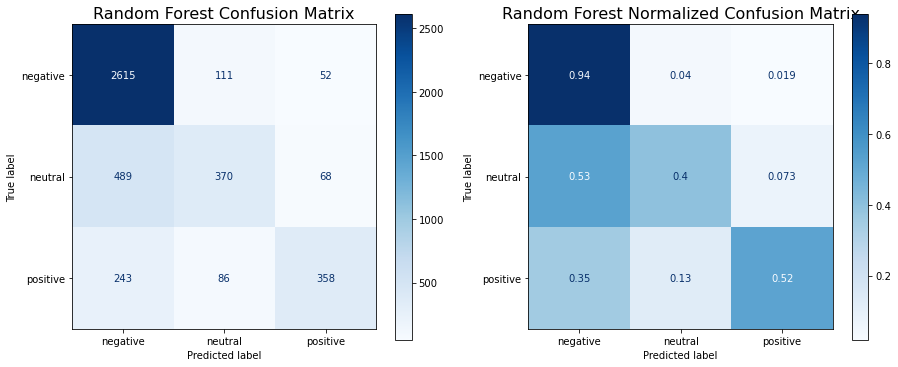

In [35]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 6), nrows = 1, ncols = 2)

plot_confusion_matrix(rfs,X_test, y_test,cmap=plt.cm.Blues, ax=ax1)
plot_confusion_matrix(rfs,X_test, y_test,cmap=plt.cm.Blues, normalize='true',ax=ax2)
ax1.set_title('Random Forest Confusion Matrix', fontsize =16)
ax2.set_title('Random Forest Normalized Confusion Matrix', fontsize =16)
plt.show()

20


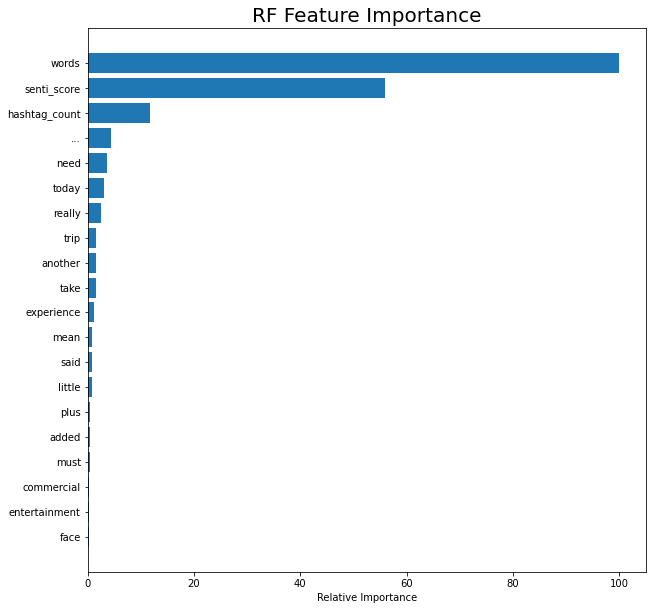

In [36]:
feature_importance = rfs.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:20]
sorted_idx = np.argsort(feature_importance)[:20]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('RF Feature Importance', fontsize =20)
plt.show()

### Evaluation of Incorrect Predictions

In [37]:
test = pd.DataFrame(y_test).reset_index()

test2 = pd.DataFrame(y_pred, columns=['predicted_sentiment'])

predictions = test.merge(test2, left_index = True, right_index = True)

compare = predictions.merge(tweets[['senti_score',"negativereason","airline","org_text",'hashtag_count','words','tokens','stemmed','lemmatizied']], how = 'inner', left_on = 'index', right_index = True)

compare['predict_correct'] = 1
compare.loc[(compare.predicted_sentiment != compare.airline_sentiment),'predict_correct'] = 0

In [38]:
senti_score = pd.DataFrame(compare.groupby(['airline_sentiment', 'predicted_sentiment'],as_index = False).agg({'senti_score':['mean','median', 'min','max','count']}).to_records())

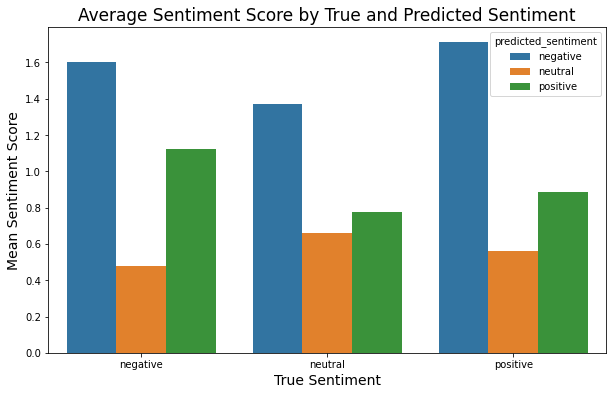

In [39]:
senti_score.columns = ['index','airline_sentiment', 'predicted_sentiment', 'mean', 'median', 'min','max', 'count']
fig, ax = plt.subplots(figsize =(10,6))
sns.barplot(data =senti_score, x='airline_sentiment', y='mean', hue='predicted_sentiment', ax = ax)
ax.set_title('Average Sentiment Score by True and Predicted Sentiment', fontsize =17)
ax.set_xlabel('True Sentiment', fontsize =14)
ax.set_ylabel('Mean Sentiment Score', fontsize =14)
plt.show()

In [40]:
bow_df['total'] = bow_df.sum(axis =1)

compare2 = predictions.merge(bow_df, how ='inner', left_index = True, right_index = True)

In [41]:
compare2[(compare2.predicted_sentiment != compare2.airline_sentiment)]

,index,airline_sentiment,predicted_sentiment,said,plus,added,commercial,experience,...,today,...,jblu,💙,appease,#flyingitforward,journal,dividend,chairman,#usairways,usairways,locator
3,3625,positive,negative,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10074,neutral,negative,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,404,positive,negative,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,9352,neutral,negative,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,4852,positive,negative,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,8245,neutral,negative,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4376,6280,positive,neutral,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4381,8940,positive,negative,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4382,14397,negative,neutral,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
compare2.groupby(['airline_sentiment', 'predicted_sentiment'],as_index = False).agg({'total':['mean','median', 'min','max','count']})

airline_sentiment predicted_sentiment     total                     
                                             mean median min max count
0          negative            negative  7.532314      8   0  19  2615
1          negative             neutral  7.387387      7   0  16   111
2          negative            positive  7.769231      8   1  15    52
3           neutral            negative  7.746421      8   0  19   489
4           neutral             neutral  7.564865      8   0  18   370
5           neutral            positive  7.720588      8   1  15    68
6          positive            negative  7.954733      8   0  18   243
7          positive             neutral  7.872093      8   1  14    86
8          positive            positive  7.564246      8   0  17   358